Loading and preprocessing training data...
Loading and preprocessing validation data...
Loading and preprocessing test data...
Training data shape: (3584, 83, 1), Labels shape: (3584, 3)
Validation data shape: (768, 83, 1), Labels shape: (768, 3)
Test data shape: (768, 83, 1), Labels shape: (768, 3)
Number of classes: 3


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 83, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 83, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,923 (1.35 MB)

 Trainable params: 353,539 (1.35 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4245 - loss: 1.5429 - val_accuracy: 0.4922 - val_loss: 1.0695
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5541 - loss: 0.9260 - val_accuracy: 0.4622 - val_loss: 1.0293
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5962 - loss: 0.8568 - val_accuracy: 0.4622 - val_loss: 0.9809
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6434 - loss: 0.7769 - val_accuracy: 0.5560 - val_loss: 0.9217
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6620 - loss: 0.7406 - val_accuracy: 0.6055 - val_loss: 0.8656
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6972 - loss: 0.6850 - val_accuracy: 0.6315 - val_loss: 0.7866
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7126 - loss: 0.6580 - val_accuracy: 0.7318 - val_loss: 0.6635
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7447 - loss: 0.5713 - val_accuracy: 0.7591 - v

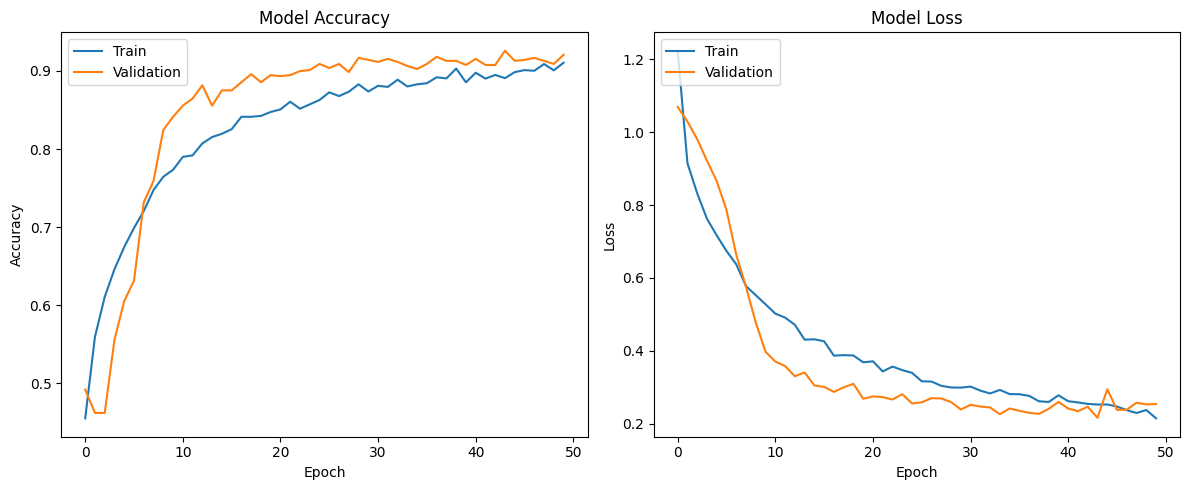

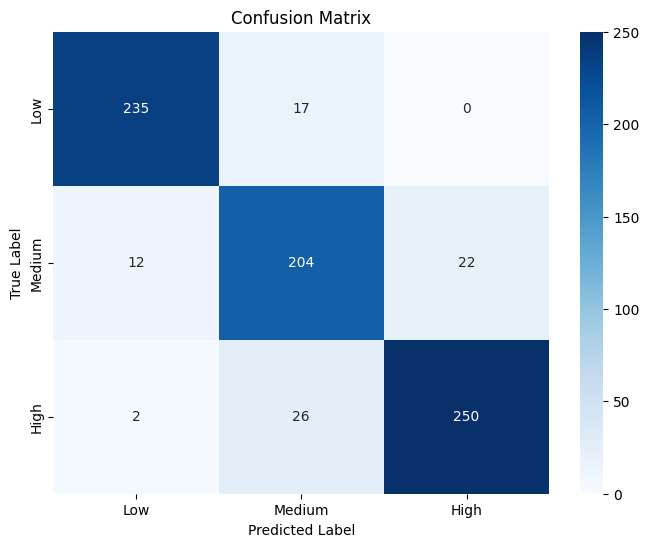


--- End of Script ---


In [1]:
# -*- coding: utf-8 -*-
# Sequential CNN for Crop Production Classification (3 Classes)

# This script demonstrates how to build and train a Sequential 1D
# Convolutional Neural Network (CNN) for classifying crop production levels
# based on tabular data using TensorFlow/Keras.
# Modified to use 3 classes (Low, Medium, High) instead of 4.

## 1. Setup and Imports

# Import necessary libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive (optional, if data is stored there)
# from google.colab import drive
# drive.mount("/content/drive")

# Define file paths (adjust if using Google Drive or local upload)
# Example for uploaded files in Colab:
TRAIN_PATH = "train.csv"
VALID_PATH = "validation.csv"
TEST_PATH = "test.csv"

# Example for Google Drive:
# DRIVE_PATH = "/content/drive/MyDrive/your_folder/"
# TRAIN_PATH = DRIVE_PATH + "train.csv"
# VALID_PATH = DRIVE_PATH + "validation.csv"
# TEST_PATH = DRIVE_PATH + "test.csv"

## 2. Load and Preprocess Data

# Load the datasets and apply preprocessing steps.
def load_and_preprocess(file_path, scaler=None, fit_scaler=False, label_encoder=None, fit_encoder=False):
    """Loads data, preprocesses features, and converts target to classes."""
    df = pd.read_csv(file_path)

    # Define class boundaries for 3 classes (Low, Medium, High)
    # Using similar boundaries as the Transformer model for consistency
    bins = [-np.inf, 1000.0, 3500.0, np.inf]  # Adjusted boundaries for 3 classes
    labels = [0, 1, 2]  # Low, Medium, High

    # Convert target variable to classes
    df["Production_Class"] = pd.cut(df["Production (M.Ton)"], bins=bins, labels=labels, right=True)

    # Separate features and target
    X = df.drop(["Production (M.Ton)", "Production_Class"], axis=1)
    y = df["Production_Class"]

    # Identify numerical features (excluding one-hot encoded Crop and District)
    # Assuming columns starting with 'Crop_' or 'District_' are one-hot encoded
    numerical_cols = [col for col in X.columns if not col.startswith("Crop_") and not col.startswith("District_")]

    # Scale numerical features
    if fit_scaler:
        scaler = StandardScaler()
        X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    else:
        if scaler is None:
            raise ValueError("Scaler must be provided if fit_scaler is False")
        X[numerical_cols] = scaler.transform(X[numerical_cols])

    # Encode labels
    if fit_encoder:
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
    else:
        if label_encoder is None:
            raise ValueError("LabelEncoder must be provided if fit_encoder is False")
        y_encoded = label_encoder.transform(y)

    # Convert labels to one-hot encoding
    y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(labels))

    # Reshape features for 1D CNN: (samples, features, 1)
    X_reshaped = X.values.reshape((X.shape[0], X.shape[1], 1))

    if fit_scaler and fit_encoder:
        return X_reshaped, y_one_hot, scaler, label_encoder
    elif fit_scaler:
         return X_reshaped, y_one_hot, scaler
    elif fit_encoder:
        return X_reshaped, y_one_hot, label_encoder
    else:
        return X_reshaped, y_one_hot

# Load and preprocess data
print("Loading and preprocessing training data...")
X_train, y_train, scaler, label_encoder = load_and_preprocess(TRAIN_PATH, fit_scaler=True, fit_encoder=True)
print("Loading and preprocessing validation data...")
X_val, y_val = load_and_preprocess(VALID_PATH, scaler=scaler, label_encoder=label_encoder)
print("Loading and preprocessing test data...")
X_test, y_test = load_and_preprocess(TEST_PATH, scaler=scaler, label_encoder=label_encoder)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")
print(f"Number of classes: {y_train.shape[1]}")

## 3. Build the 1D CNN Model

# Define the architecture of the Sequential 1D CNN.
def build_cnn_model(input_shape, num_classes):
    """Builds the Sequential 1D CNN model."""
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            # Convolutional Block 1
            layers.Conv1D(filters=64, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(pool_size=2),
            layers.Dropout(0.3),
            # Convolutional Block 2
            layers.Conv1D(filters=128, kernel_size=3, activation="relu", padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(pool_size=2),
            layers.Dropout(0.3),
            # Flatten and Dense Layers
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"), # Output layer for classification (now 3 classes)
        ]
    )
    return model

# Get input shape and number of classes from preprocessed data
input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_train.shape[1]  # Now 3 classes instead of 4

# Build the model
model = build_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
model.summary()

## 4. Train the Model

# Train the CNN using the training and validation datasets.

# Define training parameters
EPOCHS = 50 # Increase epochs for potentially better results, use EarlyStopping
BATCH_SIZE = 64

# Add Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

## 5. Evaluate the Model

# Get best validation accuracy from history
# Check if 'val_accuracy' exists in history (it should if validation_data is provided)
if 'val_accuracy' in history.history:
    best_val_accuracy = max(history.history['val_accuracy'])
    print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")
else:
    print("\nValidation accuracy not available in history.")

# Evaluate the trained model on the test dataset.
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
print("\nGenerating predictions on test data...")
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert one-hot encoded y_test back to single labels for comparison
y_test_labels = np.argmax(y_test, axis=1)

# Define class names
class_names = ["Low", "Medium", "High"]  # Updated class names

# Print Classification Report (includes Recall and F1-score per class, and macro/weighted averages)
print("\nClassification Report (includes Recall and F1-score):")
print(classification_report(y_test_labels, y_pred, target_names=class_names))

# Calculate and print Macro F1 Score separately
macro_f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"\nMacro F1 Score (Test Set): {macro_f1:.4f}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred)
print(cm)

## 6. Visualize Results

# Plot training history and confusion matrix.

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
if 'val_accuracy' in history.history: # Check if validation accuracy exists
    plt.plot(history.history["val_accuracy"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
if 'val_loss' in history.history: # Check if validation loss exists
    plt.plot(history.history["val_loss"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.tight_layout()
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\n--- End of Script ---")
